In [1]:
#ITCS494 Machine Learning
#First semester 2020/2021
#Lab 2 
#Multivariate Linear Regression and Gradient Descent with stopping condition

#ID:20168013
#Name: RAMSHA KHALID MUHAMMAD KHALID

#Problem

#Look at the following starter Google Colab notebook. Make your own notebook in Colab or in Jupyter Notebook on your machine and solve the following problem.

#(a) Read the student data and use all features and implement linear regression with multiple variables to predict the final grade. You should implement the linear regression algorithm from scratch (do not use the one available in Python libraries such as SciKit Learn). You can modify your code from the previous lab to implement the cost function, the recursive descent functions, etc.

#(b) Then after running the recursive descent algorithm for finding the values of theta0 and theta1, draw a graph showing a scatter plot of the data with the resulting line. You can draw this for several steps to see how recursive descent gradually finds the minimum error/cost.

#(c) Think about using feature scaling and mean normalization, and see if it makes your convergence faster.

#Save the file and upload it in the assignment as a Jupyter Notebook. Your assignment submission should show me what you did in points (a), (b), and (c) in the same Notebook.

In [2]:
#Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
#Load dataset
data = pd.read_csv('original-data.csv')

In [4]:
#Remove rows with any empty or zero values
data.replace('', np.nan, inplace=True)
data.replace(0, np.nan, inplace=True)

data.dropna(how='any', inplace=True)

In [5]:
#Change text to numbers
data["Gender"].replace({"f": 1 , "m": 0}, inplace=True)

In [6]:
#Make copies of dataframe for x and y
x=data.copy(deep=True)
y=data.copy(deep=True)

In [7]:
#Drop extra columns
x.drop(['ID','Final'], inplace=True, axis=1)
X=x.copy(deep=True)
y.drop(['ID','Gender','Quizes','Midterm2','Midterm1'], inplace=True, axis=1)
y

,Final
0,55.0
1,45.5
2,37.0
3,27.5
4,40.0
...,...
75,58.5
76,61.5
77,52.5
78,54.0


In [8]:
#Feature scaling with mean normalizattion of data
x = x.apply(lambda x: (x-x.mean())/x.max())

In [9]:
#Add values of X0 in row 0 for theta0
x = pd.concat([pd.Series(1, index=x.index, name='X0'), x], axis=1)
x

,X0,Gender,Midterm1,Midterm2,Quizes
0,1,-0.458333,0.141953,0.131313,-0.033472
1,1,0.541667,-0.225694,-0.111111,-0.183472
2,1,-0.458333,-0.108047,-0.005051,-0.023472
3,1,-0.458333,-0.093342,0.101010,-0.213472
4,1,0.541667,0.039011,-0.186869,-0.073472
...,...,...,...,...,...
75,1,0.541667,0.112541,0.055556,0.146528
76,1,0.541667,0.156658,0.116162,0.126528
77,1,-0.458333,0.171364,0.222222,0.146528
78,1,-0.458333,0.289011,0.191919,0.106528


In [16]:
#save number of datasets to m and number of features to n
m = len(x)
n = len(x.columns)

#Initialize values of iterations and learning rate
iterations = 150
alpha = 0.035

#Initialize theta with 0s
theta = np.array([0]*len(x.columns))
theta

array([0, 0, 0, 0, 0])

In [11]:
#Define hypothesis function
def hyp(X, theta):
    return np.transpose(theta)@X

In [12]:
#Define const function to compute error cost
def cost(theta):
    sum = 0
    for i in range(m):
        sum = sum + (hyp(x.iloc[i], theta)-y.iloc[i])**2
    return sum/(2*m)

In [13]:
#Define descent function for gradient descent
def descent(theta):
    costs = []
    for i in range(iterations):
        temp = []
        
        #Calculate thetas for each iteration
        for j in range(n):
            t = theta[j] - alpha * (derivative(j, theta)/m)
            temp.append(t)
            
        #Find cost with thetas at each iteration   
        theta = temp
        c = cost(theta).tolist()
        
        #Condition for auto stopping the descent
        if(costs != [] and (costs[-1] - c[0]) < 0.1):
            costs.append(c[0])
            print("Iteration " , i)
            print("Error Cost = ", c[0])
            print()
            break
    
        costs.append(c[0])
        
        #Print iteration and cost computed
        if i%10 == 0:
            print("Iteration " , i)
            print("Error Cost = ", c[0])
            print()
        
    return costs, i

#Define derivative function for calculating partial derivative of each theta
def derivative(j, theta):
    s = 0 
    for k in range(m):
        s = s + ((hyp(x.iloc[k], theta)-y.iloc[k])*x.iloc[k][j])
    return s

Iteration  0
Error Cost =  1143.2665821462717

Iteration  10
Error Cost =  593.668514447923

Iteration  20
Error Cost =  323.53621172413773

Iteration  30
Error Cost =  190.47952918646533

Iteration  40
Error Cost =  124.66895091558662

Iteration  50
Error Cost =  91.85860951106261

Iteration  60
Error Cost =  75.25291054839433

Iteration  70
Error Cost =  66.61397787000429

Iteration  80
Error Cost =  61.900758923011104

Iteration  90
Error Cost =  59.130439151110814

Iteration  100
Error Cost =  57.32966994075097

Iteration  110
Error Cost =  56.02023909574886

Iteration  119
Error Cost =  55.06455515338915



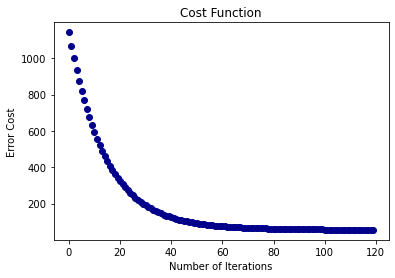

In [14]:
#Call gradient descent and plot graph of error costs along the iterations
costs, iters = descent(theta)
iters = list(range(iters+1))

plt.figure()
plt.title('Cost Function')
plt.xlabel('Number of Iterations')
plt.ylabel('Error Cost')

plt.scatter(x= iters , y=costs, color="darkblue")
plt.show()

In [15]:
#Calculating theta using normal equation (Bonus hehe :D)
def calculateTheta():
    return np.linalg.inv(np.transpose(X)@X) @ np.transpose(X) @ y

def cost(theta):
    sum = 0
    for i in range(m):
        sum = sum + (hyp(X.iloc[i], theta)-y.iloc[i])**2
    return sum/(2*m)

ThetaN = calculateTheta().values.tolist()

#Calculate cost with theta from normal equation
CostN = cost(ThetaN)

print("Cost by theta from normal equation = ", CostN.tolist())

Cost by theta from normal equation =  [29.436069582958662]
